# Explore flight delay data wrt day of week

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set_style('white')

# Load data

In [2]:
# Import custom code
from flightdelay.fld import io as flio
airlines_df, airports_df, flights_df = flio.load_data()

In [3]:
# Filter data to keys of interest
keys = ['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY']
flights_df = flights_df[keys]

In [4]:
all_airports, airport_inverse, airport_count = np.unique(flights_df['ORIGIN_AIRPORT'],return_counts=True,return_inverse=True)

# Determine number of flights for the origin airport
Nflights_orig = np.zeros(len(airport_inverse))
for i in range(len(all_airports)):
    Nflights_orig[np.where(airport_inverse==i)] = airport_count[i]
    
flights_df = flights_df.loc[flights_df.index[Nflights_orig>=7300]]

In [5]:
# Remove cancelled flights
flights_df = flights_df.dropna()
flights_df.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
0,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,...,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0
1,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,...,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0
2,1,1,4,US,840,N171US,SFO,CLT,20,18.0,...,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0
3,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,...,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0
4,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,...,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0


# Departure hour

In [7]:
flights_df['HOUR_DEPARTURE'] = np.floor(flights_df['SCHEDULED_DEPARTURE'].values/100).astype(int)

In [8]:
# Separate data by airport
all_airports, airport_inverse, airport_count = np.unique(flights_df['ORIGIN_AIRPORT'],return_counts=True,return_inverse=True)

airport_dfs = {}
for k in all_airports:
    airport_dfs[k] = flights_df[flights_df['ORIGIN_AIRPORT']==k]

# Departure hour by airport

In [32]:
gb_aph = flights_df[['ORIGIN_AIRPORT','HOUR_DEPARTURE','DEPARTURE_DELAY']].groupby(['ORIGIN_AIRPORT','HOUR_DEPARTURE'])
mean_delays = gb_aph.agg(['mean'])

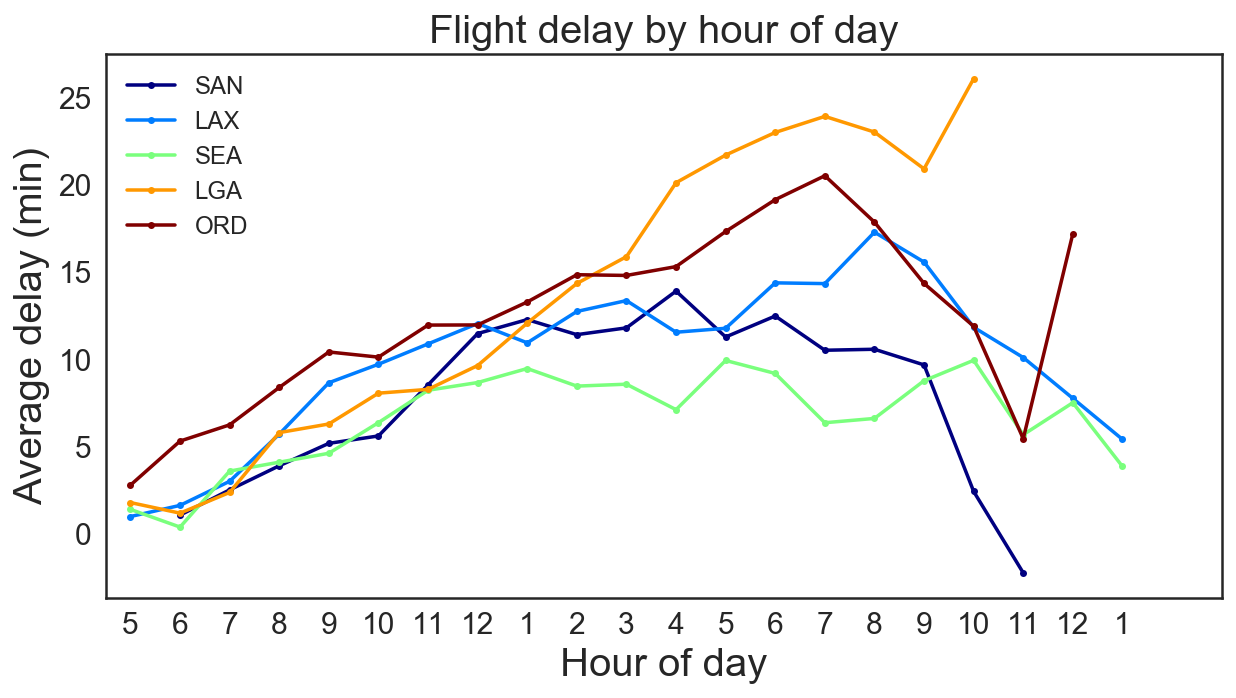

In [49]:
# Plot for many aps
aps = ['SAN','LAX','SEA','LGA','ORD']

def getcmaprgb(N, cmap):
	"""Get the RGB values of N colors across a colormap"""
	return cmap(np.linspace(0,255,N).astype(int))
from matplotlib import cm
colors = getcmaprgb(len(aps),cm.jet)

plt.figure(figsize=(10,5))
for i, ap in enumerate(aps):
    df_ap = mean_delays.loc[ap]
    hs = df_ap.index.values
    hs = (hs-2) % 24
    ds = df_ap['DEPARTURE_DELAY']['mean'].values
    ds = ds[np.argsort(hs)]
    hs = hs[np.argsort(hs)]
    plt.plot(hs, ds,'.-',color=colors[i],label=ap)
plt.xlabel('Hour of day',size=20)
plt.ylabel('Average delay (min)', size=20)
plt.title('Flight delay by hour of day',size=20)
plt.xlim((2.5,21.5))
plt.yticks(size=15)
plt.xticks(np.arange(3,26),[5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1],size=15)
plt.legend(loc='best',fontsize=12)

# Departure hour for all flights

In [70]:
gb_aph = flights_df[['HOUR_DEPARTURE','DEPARTURE_DELAY']].groupby(['HOUR_DEPARTURE'])
mean_delays = gb_aph.agg(['mean','count','sem'])

In [71]:
435/len(flights_df)

8.286462434894122e-05

In [72]:
mean_delays

DEPARTURE_DELAY                  
                          mean   count       sem
HOUR_DEPARTURE                                  
0                     7.191693   14445  0.280563
1                     7.574845    4349  0.619687
2                     5.157143     840  1.024010
3                    22.732057     209  3.302888
4                    13.469027     226  3.172362
5                     1.656357   90143  0.107055
6                     1.912709  327652  0.054246
7                     3.115357  352965  0.053492
8                     4.548148  358148  0.054016
9                     5.646663  329869  0.055537
10                    6.868738  336632  0.055749
11                    7.843047  322090  0.060642
12                    8.978082  320279  0.062695
13                    9.909567  323899  0.063151
14                   11.283301  291647  0.067656
15                   12.071716  333944  0.065743
16                   13.161433  299041  0.071928
17                   14.182944  344510  0.069666
18                   15.417148  301394  0.076081
19                   15.289568  310949  0.072644
20                   15.415003  248020  0.079498
21                   13.798284  180734  0.088116
22                   11.794693  114531  0.101509
23                    9.610672   43010  0.163449

[19 20 21 22 23  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


/Users/scott/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


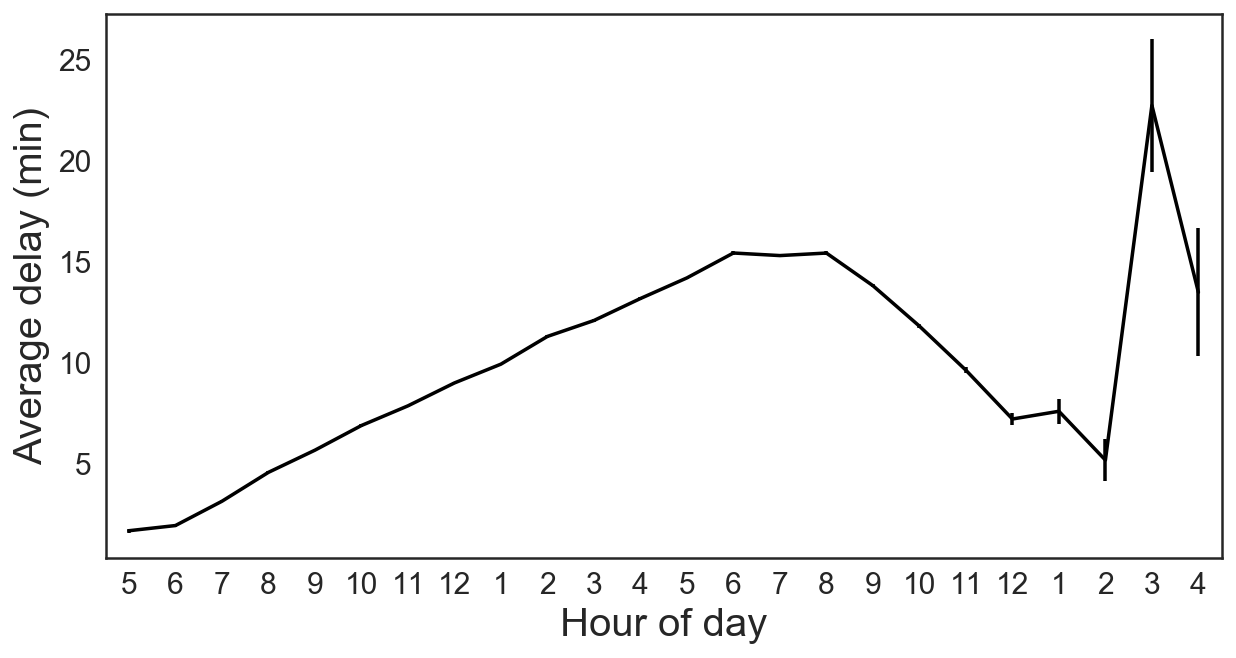

In [73]:
plt.figure(figsize=(10,5))
hs = mean_delays.index.values
hs = (hs-5) % 24
print(hs)
ds = mean_delays['DEPARTURE_DELAY']['mean'].values
ds = ds[np.argsort(hs)]
sems = mean_delays['DEPARTURE_DELAY']['sem'].values[np.argsort(hs)]
hs = hs[np.argsort(hs)]
plt.errorbar(hs, ds,yerr=sems,color='k')
plt.xlabel('Hour of day',size=20)
plt.ylabel('Average delay (min)', size=20)
plt.xlim((-.5,23.5))
plt.yticks(size=15)
plt.xticks(np.arange(24),[5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4],size=15)
plt.legend(loc='best',fontsize=12)

(-0.12931960192810821, 0.54700678907655265)


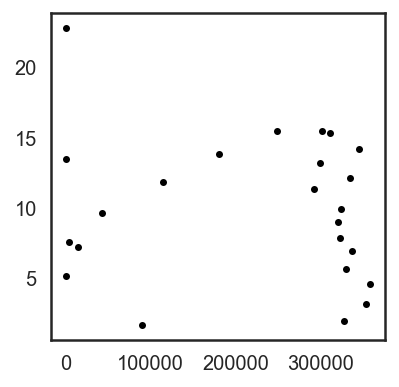

In [68]:
delay_means = mean_delays['DEPARTURE_DELAY']['mean'].values
flight_counts = mean_delays['DEPARTURE_DELAY']['count'].values
plt.figure(figsize=(3,3))
plt.plot(flight_counts,delay_means,'k.')
print(sp.stats.pearsonr(flight_counts,delay_means))